In [2]:
# import the libraries

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# creating the path variables

img_path = "./images/"
pizza_img = 'pizza_bluescreen.jpg'
space_img = 'space_background.jpg'

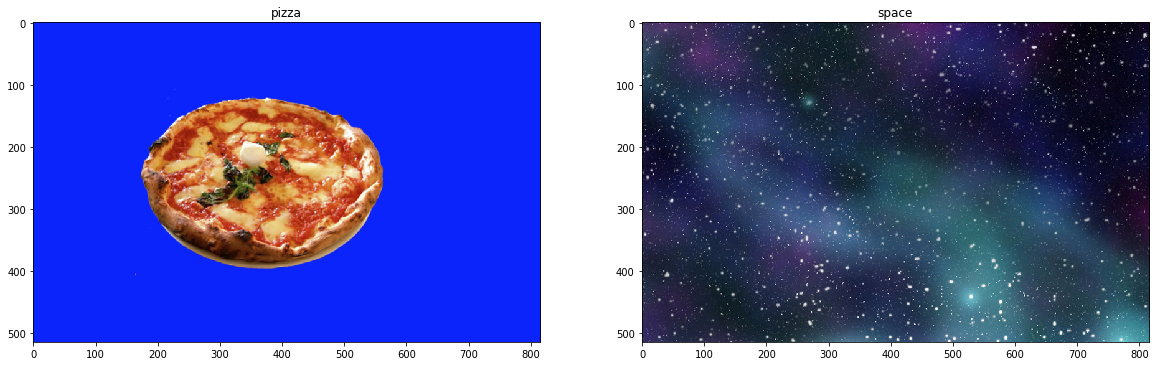

In [46]:
#loading the image and converting from BGR TO RGB

img = cv2.imread(img_path+pizza_img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

background_img = cv2.imread(img_path+space_img)
background_img = cv2.cvtColor(background_img,cv2.COLOR_BGR2RGB)

# cropping the backgoround image to the size of the pizza image
background_img = background_img[0:514,0:816]

#plotting the images
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,30))
ax1.set_title("pizza")
ax1.imshow(img)
ax2.set_title("space")
ax2.imshow(background_img)

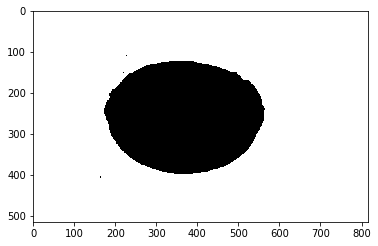

In [47]:
# creating lower-bounds and upper-bounds for the mask
# here we want to remove the blue color

lower_blue = np.array([0,0,230])
upper_blue = np.array([50,50,255])

# creating the mask
mask = cv2.inRange(img,lower_blue,upper_blue)

#plotting the mask
plt.imshow(mask,cmap='gray')

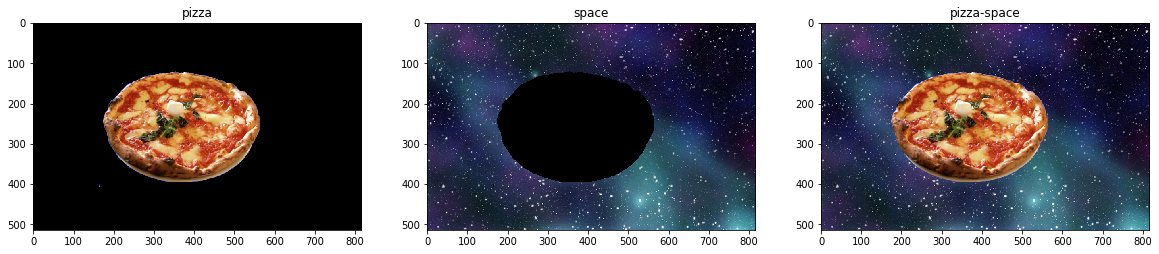

In [48]:
#converting the area of the image where mask is not black to black[0,0,0]
img[mask != 0 ] = [0,0,0]
# plt.imshow(img)

#converting the area of the background where the mask is black to balck[0,0,0]
background_img[mask == 0 ] = [0,0,0]
# plt.imshow(background_img)

# finally mearging the the two images
final_img = img + background_img

# plotting the image 
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,30))
ax1.set_title("pizza")
ax1.imshow(img)
ax2.set_title("space")
ax2.imshow(background_img)
ax3.set_title("pizza-space")
ax3.imshow(final_img)